<a href="https://colab.research.google.com/github/alimirza817/CS50_AI_Project/blob/main/Arch_Technologies_T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Brain Tumor Segmentation Using Yolo11 & SAM2**

In [2]:
!pip install --upgrade ultralytics


## **Downloading Yolo11 For Object Detection**

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
version = project.version(8)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 112.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-8 in yolov11:: 100%|██████████| 3924/3924 [00:00<00:00, 7319.08it/s]


## ***Giving Path From Dataset***

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.pt")

# Train the model
train_results = model.train(
    data="/content/Tumor-Detection-8/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tumor-Detection-8/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

train: Scanning /content/Tumor-Detection-8/train/labels.cache... 1370 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1370/1370 [00:00<?, ?it/s]

train: /content/Tumor-Detection-8/train/images/no_tumor_914_jpg.rf.6714544aee2bde5213fd2c366dff62aa.jpg: 1 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1456, len(boxes) = 1461. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 292.5±63.3 MB/s, size: 29.4 KB)


val: Scanning /content/Tumor-Detection-8/valid/labels.cache... 395 images, 0 backgrounds, 0 corrupt: 100%|██████████| 395/395 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.43G     0.9377       3.05      1.287         13        640: 100%|██████████| 86/86 [00:27<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.88it/s]


                   all        395        415      0.837      0.196      0.391      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.81G     0.9257      1.941      1.256         16        640: 100%|██████████| 86/86 [00:26<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.05it/s]


                   all        395        415      0.684      0.431      0.434      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.81G     0.9627      1.705      1.295         24        640: 100%|██████████| 86/86 [00:26<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]


                   all        395        415      0.827       0.42      0.466      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.81G     0.9641      1.541      1.291         18        640: 100%|██████████| 86/86 [00:26<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]


                   all        395        415       0.82      0.478      0.515      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.81G     0.9276      1.345      1.256         11        640: 100%|██████████| 86/86 [00:25<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        395        415      0.779      0.428      0.427      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.81G     0.8845      1.235       1.24         21        640: 100%|██████████| 86/86 [00:25<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        395        415      0.852      0.505      0.576      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.81G     0.8655      1.106      1.231         15        640: 100%|██████████| 86/86 [00:25<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]

                   all        395        415      0.748      0.582      0.578      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.81G     0.8639      1.063      1.234         18        640: 100%|██████████| 86/86 [00:25<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.93it/s]

                   all        395        415      0.715      0.545      0.585      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.81G     0.7992     0.9587      1.171         21        640: 100%|██████████| 86/86 [00:25<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.07it/s]

                   all        395        415      0.788      0.537       0.58      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.81G     0.7977     0.9304      1.189         19        640: 100%|██████████| 86/86 [00:25<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.81it/s]

                   all        395        415      0.767      0.532      0.596      0.456


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.81G     0.7135     0.9618      1.162         10        640: 100%|██████████| 86/86 [00:25<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.14it/s]

                   all        395        415       0.82      0.564      0.604      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.81G     0.6882     0.8592      1.145         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.76it/s]

                   all        395        415      0.838       0.55      0.609      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.81G     0.6732     0.8115      1.125         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.03it/s]

                   all        395        415       0.78      0.602      0.603      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.81G     0.6299     0.7347      1.094         11        640: 100%|██████████| 86/86 [00:24<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.23it/s]

                   all        395        415      0.833      0.612      0.632      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.81G     0.6148     0.7048      1.075         11        640: 100%|██████████| 86/86 [00:24<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.63it/s]

                   all        395        415      0.852      0.591      0.615      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.81G     0.5964       0.67      1.064         10        640: 100%|██████████| 86/86 [00:24<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.31it/s]

                   all        395        415      0.856      0.618      0.648      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.81G     0.5744      0.631      1.057         12        640: 100%|██████████| 86/86 [00:24<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]

                   all        395        415      0.872      0.613      0.656       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.81G     0.5505     0.6198      1.029         11        640: 100%|██████████| 86/86 [00:23<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]

                   all        395        415      0.859      0.606      0.647      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.81G     0.5412     0.5771      1.036         10        640: 100%|██████████| 86/86 [00:23<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.55it/s]

                   all        395        415      0.911      0.603      0.662      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.81G     0.5265     0.5574      1.029         10        640: 100%|██████████| 86/86 [00:24<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  4.22it/s]

                   all        395        415       0.86      0.645      0.668      0.549



20 epochs completed in 0.161 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.161 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.52it/s]


                   all        395        415       0.86      0.645      0.668      0.549
              NO_tumor        115        116      0.923      0.974       0.97      0.801
                glioma         30         36      0.707      0.603      0.641      0.466
            meningioma        144        148      0.931      0.899      0.943      0.828
             pituitary        106        111       0.74      0.748      0.787      0.646
space-occupying lesion-          1          4          1          0    0.00162    0.00113
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 3.1ms postprocess per image
Results saved to runs/detect/train2


In [10]:
from IPython.display import Image


### **Results Outputs**

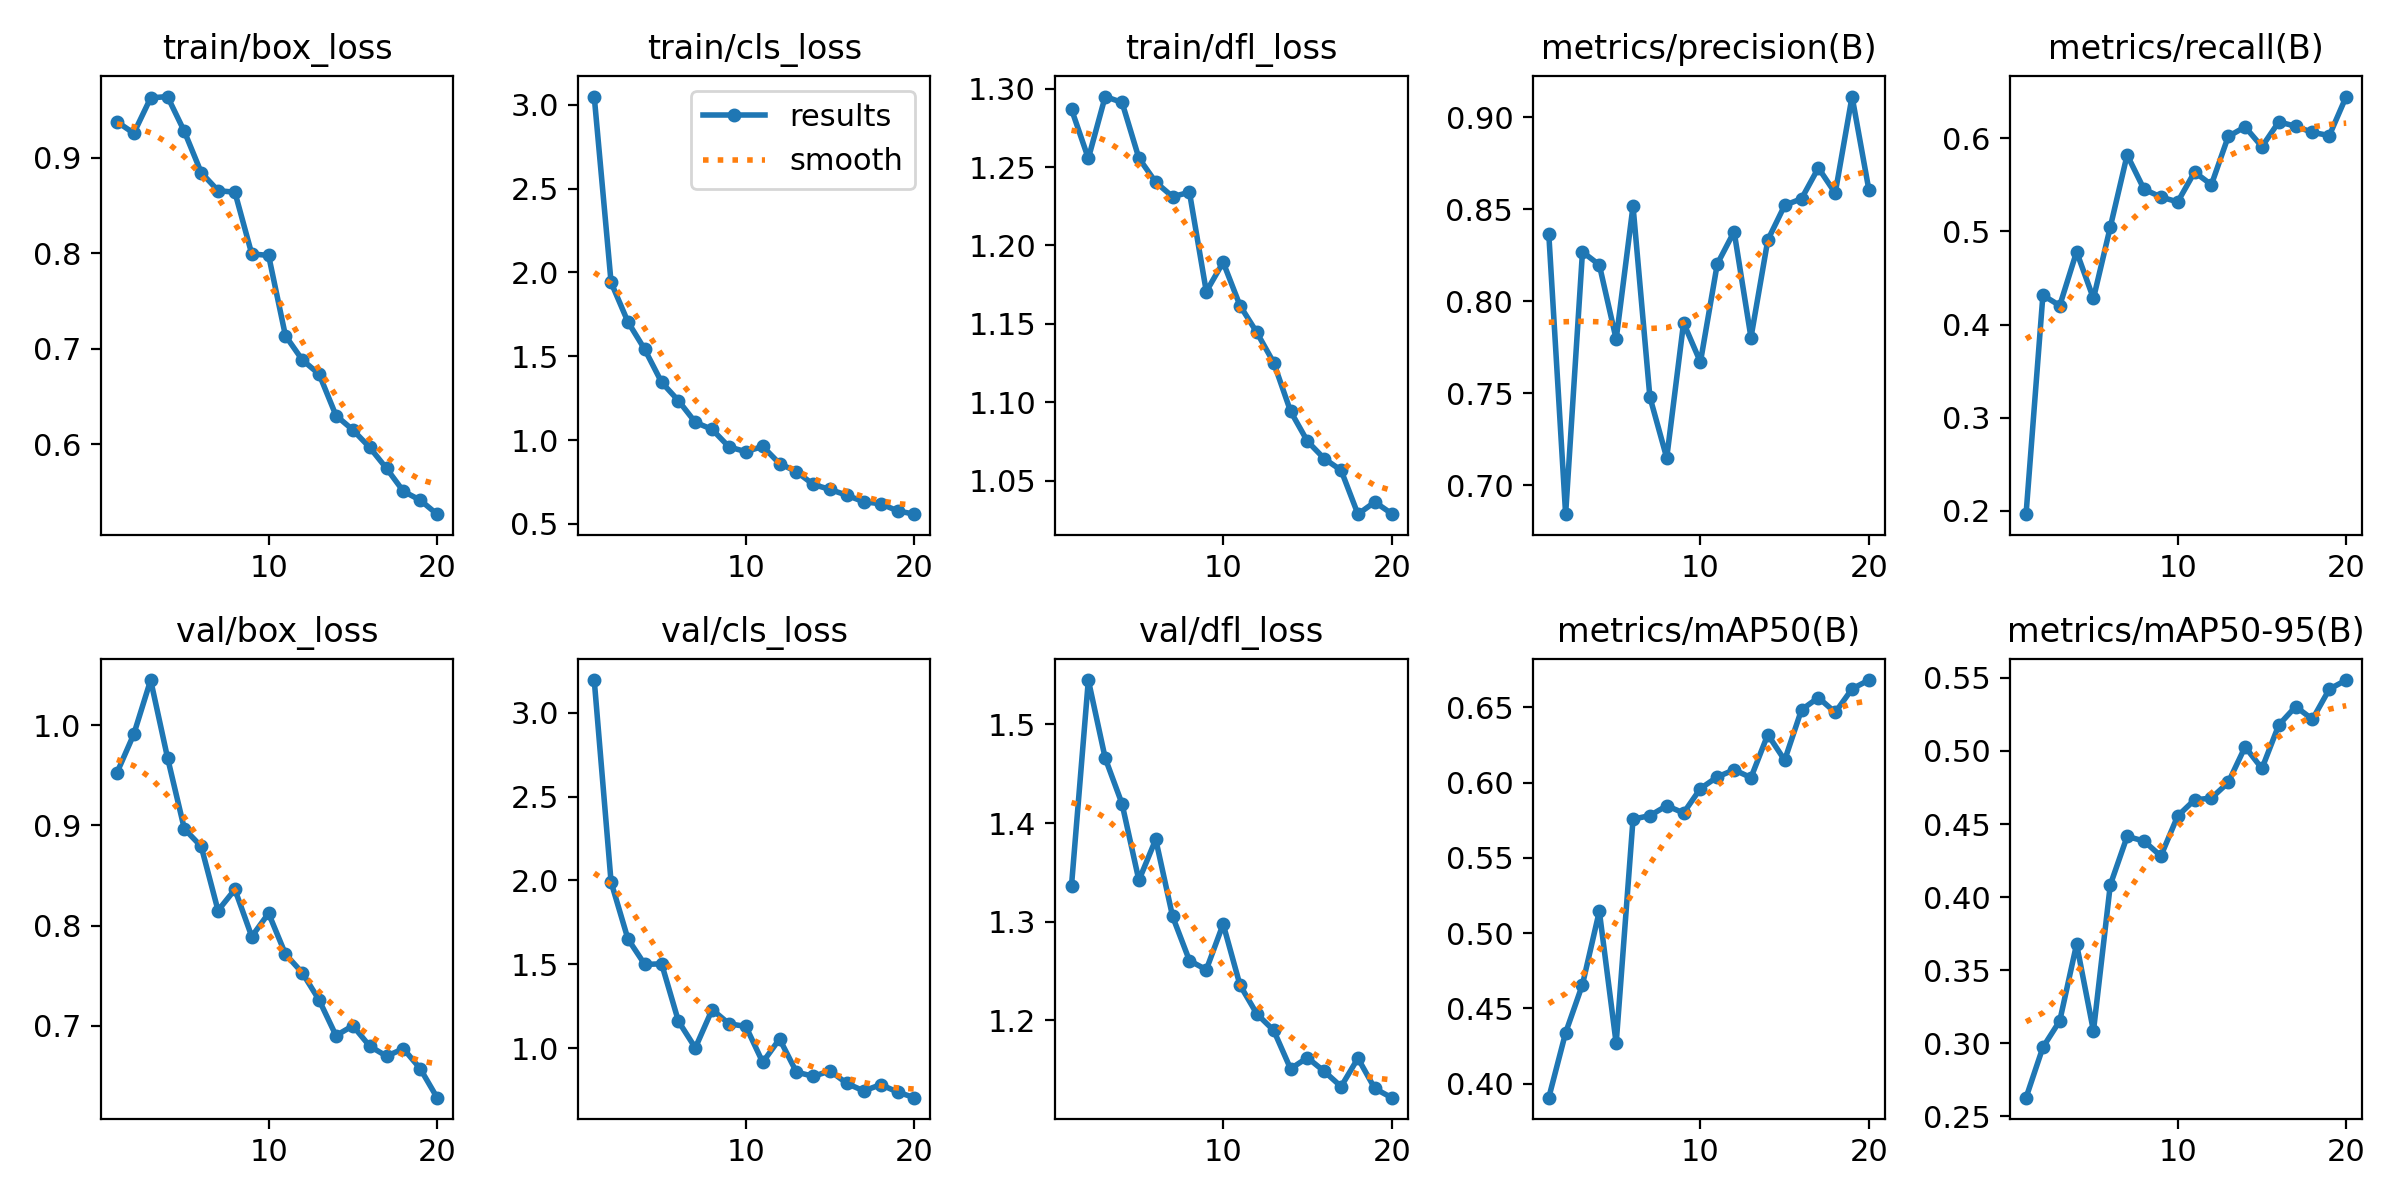

In [11]:
Image("/content/runs/detect/train/results.png", width=600)


### **Testing Brain Tumor Image**


image 1/1 /content/Brain tumor.jpeg: 640x544 1 meningioma, 48.9ms
Speed: 2.4ms preprocess, 48.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict


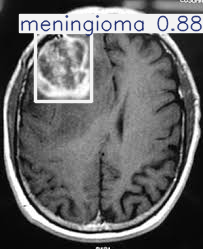

In [14]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Perform object detection on an image
results = model("/content/Brain tumor.jpeg", save=True)
results[0].show()

In [15]:
# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.8774], device='cuda:0')
data: tensor([[ 35.7976,  32.7758,  91.4352, 101.3348,   0.8774,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (249, 203)
shape: torch.Size([1, 6])
xywh: tensor([[63.6164, 67.0553, 55.6376, 68.5590]], device='cuda:0')
xywhn: tensor([[0.3134, 0.2693, 0.2741, 0.2753]], device='cuda:0')
xyxy: tensor([[ 35.7976,  32.7758,  91.4352, 101.3348]], device='cuda:0')
xyxyn: tensor([[0.1763, 0.1316, 0.4504, 0.4070]], device='cuda:0')


### **Importing SAM2 Model for Segmentation**

In [16]:
from ultralytics import YOLO
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/content/runs/detect/train/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/content/Brain tumor.jpeg")  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results:
     class_ids = result.boxes.cls.int().tolist()  # noqa
     if len(class_ids):
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device=0)


image 1/1 /content/Brain tumor.jpeg: 640x544 1 meningioma, 12.5ms
Speed: 2.5ms preprocess, 12.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)


100%|██████████| 154M/154M [00:02<00:00, 73.0MB/s]


Results saved to runs/segment/predict
